# Tutorial :  Installation of Pytorch,Tensorflow, TensorBoard and Graphiz

## 1. pip path check
+ __pip__ is a library that mangage all the site-packages in python

+ We are going to use __pip__ to install pytroch and tensorflow

### 1.1 Check the verison of __pip__

In [8]:
import pip 

print(pip.__version__)

22.1.2


If it's not __22.1.2__ please update:

1. Call the terminal : $ctrl$ + ~ 

2. Input: __python -m pip install --upgrade pip__

3. Press  $Enter$

Then check again

In [9]:
pip.__version__

'22.1.2'

### 1.2 Check the instal path of __pip__

Make Sure it's the same path with Python

In [10]:
pip.__path__
print("Python" in pip.__path__[0] )

True


## 2 Pytroch Installation

### 2.1 Matching the Version of __CUDA__ 

Visit :https://pytorch.org/
to check the verison 

For our case: 

1. Call the terminal : $ctrl$ + ~ 

2. Input: __pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116__

3. Press  $Enter$

### 2.2 Does GPU work for us ? 

Run the following code, if result shows __"cuda:0"__, cheers ! 

In [11]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "CPU")

print(device)

cuda:0


Another way to examine the GPU, is assigning a tensor to CUDA. 

(Also an example of leverarging GPU in __pytorch__)

In [12]:
vector = torch.tensor([[4.0,1.0]]).to(device='cuda')

print(vector)

tensor([[4., 1.]], device='cuda:0')


## 3 Tensorflow Installation

For __Tensorflow__ you do not have to check the version, but you need make sure installed version is GPU not CPU

For our case: 

1. Call the terminal : $ctrl$ + ~ 

2. Input: __pip install tensorflow-gpu__

3. Press  $Enter$

### 3.1 Does GPU work for us ?

If you installed GPU version, __Tensorflow__ runs everything based on GPU without manual assignment



#### 3.1.1 Build with GPU support ?
Check if the outputs are $True$


In [13]:
import tensorflow as tf
print("Is tensorflow bulit with GPU supprot?\n{}".format(tf.test.is_built_with_gpu_support()))
print("\nIs tensorflow bulit with CUDA?\n{}".format(tf.test.is_built_with_cuda()))



Is tensorflow bulit with GPU supprot?
True

Is tensorflow bulit with CUDA?
True


Keep in mind how many Invidia GPU you have, the number should be identical :)

In [14]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


#### 3.1.2 Show the device name

I offer another script in TEST.py where can check detailed information

In [15]:
tf.test.gpu_device_name()

'/device:GPU:0'

## 4  Install __graphiz__ and __pydot__

### 4.1 graphiz

1. Call the terminal : $ctrl$ + ~ 

2. Input: __pip install graphiz__

3. Press  $Enter$

### 4.2 pydot 

1. Call the terminal : $ctrl$ + ~ 

2. Input: __pip install pydot_ng__

3. Press  $Enter$

## 5 Check if the tensorboard work

The __graphiz__ and __pydot__ are necessary for the tensorborad and __plot_model()__ function in Tensorflow

### 5.1 Check  graphiz

Ignore the process, just check if you can see the figure 

In [16]:
from tensorflow import keras
from keras.datasets import mnist
from keras import layers
(images,labels),(test_images,test_labels) = mnist.load_data()

images = images.reshape((60000,28*28))
images = images.astype('float32')/255


test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

train_images,val_images = images[10000:],images[:10000]


train_labels,val_labels = labels[10000:],labels[:10000]


import numpy as np
def get_mnist_model():
    inputs = keras.Input(shape=(28*28,))
    features = layers.Dense(512,activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10,activation='softmax')(features)
    model = keras.Model(inputs=inputs,outputs=outputs)
    return model

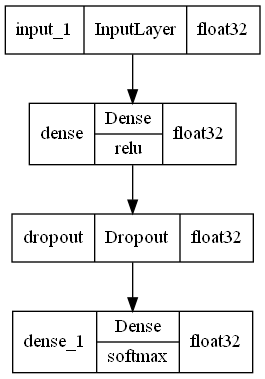

In [17]:
model = get_mnist_model()
keras.utils.plot_model(model,'Test.png',show_layer_activations=True,show_dtype=True,show_layer_names=True)


### 5.2 Check Tensorboard.

We will going to use a model of mnist

In [18]:
model = get_mnist_model()

model.compile(optimizer= keras.optimizers.RMSprop(),
                loss = keras.losses.SparseCategoricalCrossentropy(),
                metrics = ['accuracy']
                )

from keras.callbacks import TensorBoard
callback = [  TensorBoard(log_dir="E:\\Python-Machine-Learning\\Deep_Learning_With_python\\Test\\") ]

In [19]:
model.fit(train_images,train_labels,
            epochs = 3,
            validation_data = (val_images,val_labels),
            callbacks = callback
            )

Epoch 1/3
1563/1563 [==============================] - 17s 9ms/step - loss: 0.2906 - accuracy: 0.9153 - val_loss: 0.1477 - val_accuracy: 0.9577
Epoch 2/3
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1668 - accuracy: 0.9540 - val_loss: 0.1311 - val_accuracy: 0.9649
Epoch 3/3
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1403 - accuracy: 0.9626 - val_loss: 0.1237 - val_accuracy: 0.9690


During Running, Vscode will recommand you to install a plugin, just install it and you can check the tensorboard in VScode.

In the VSCODE, you have installed a plug-in for tensorboard.

__However, you should change the path you load file every time__.

The way to change the folder is 

1.  ctrl+shift+p 

2.  type: Python : Launch TensorBoard

3. Choose the folder or type the path 

4. Then the tensorboard window will appear!